# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

cities = []
countries = []

# Identify nearest city for each lat, lng combination
for lat_lngs in lat_lngs:
    lat, lon = lat_lngs
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    cities.append(name)
    countries.append(country_code)
cities_df = pd.DataFrame({"City": cities, "Country": countries})  

# Drop any duplicate values
cities_df = cities_df.drop_duplicates('City')

# Visualize the data frame
cities_df.head()


,City,Country
0,pachino,it
1,saskylakh,ru
2,butaritari,ki
3,rikitea,pf
4,hobart,au


In [51]:
#~~~~~~~~~~~~~~~~~~~~~ Creating a dictionary to hold the values

# # Adding additional columns to the exost
# const_cities = {}

# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# for city in cities:
#     response = requests.get(query_url + city).json()
#     const_cities[city].city_name = response['name']
#     const_cities[city].city_name = response['name']
#     #const_cities.lat.append(response['coord']['lat'])
    
# print(const_cities) 

In [3]:
# Creating a new DataFrame
cities_df["Date"] = ""
cities_df['Lat'] = ""
cities_df["Lng"] = ""
cities_df["Humidity"] = ""
cities_df["Wind Speed"] = ""
cities_df["Cloudiness"] = ""
cities_df["Max Temp"] = ""

cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,pachino,it,,,,,,,
1,saskylakh,ru,,,,,,,


In [88]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# cities = ["Paris", "Milan"]
# Start the call counter 
row_count = 1


# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    
#     target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
#     print(response)
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]["City"]))
    print(target_url)

    #print(response)
    try:
        city_df.set_value(index, "Lat", response['coord']['lat'])
        city_df.set_value(index, "Lng", response['coord']['lon'])
        city_df.set_value(index, "Max Temp", response['main']['temp_max'])
        city_df.set_value(index, "Cloudiness", response['clouds']['all'])
        city_df.set_value(index, "Humidity", response['main']['humidity'])
        city_df.set_value(index, "Wind Speed", response['wind']['speed'])
        city_record = response["name"]   
        row_count =+ 1
    except:
         print("City not found. Skipping...")
#         Wait a second in loop to not over exceed rate limit of API
    if row_count % 50 == 0:
        print("**********************")
        print("PAUSE FOR 30 SECONDS")
        print("**********************")
        time.sleep(30)
    
    continue   

Beginning Data Retrieval
-------------------------------
----------------------
Now retrieving city #2: busselton
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=busselton
City not found. Skipping...
----------------------
Now retrieving city #2: port hardy
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=port+hardy
City not found. Skipping...
----------------------
Now retrieving city #2: sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=sioux+lookout
City not found. Skipping...
----------------------
Now retrieving city #2: khatanga
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=khatanga
City not found. Skipping...
----------------------
Now retrieving city #2: taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&

----------------------
Now retrieving city #2: kununurra
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=kununurra
City not found. Skipping...
----------------------
Now retrieving city #2: antsohihy
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=antsohihy
City not found. Skipping...
----------------------
Now retrieving city #2: barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=barentsburg
City not found. Skipping...
----------------------
Now retrieving city #2: cayenne
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cayenne
City not found. Skipping...
----------------------
Now retrieving city #2: aloleng
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=aloleng
City not found. Skipping...
--------------

----------------------
Now retrieving city #2: kollam
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=kollam
City not found. Skipping...
----------------------
Now retrieving city #2: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cabo+san+lucas
City not found. Skipping...
----------------------
Now retrieving city #2: sawtell
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=sawtell
City not found. Skipping...
----------------------
Now retrieving city #2: saint-georges
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=saint-georges
City not found. Skipping...
----------------------
Now retrieving city #2: narsaq
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=narsaq
City not found. Skipping...
--------

----------------------
Now retrieving city #2: liverpool
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=liverpool
City not found. Skipping...
----------------------
Now retrieving city #2: kralendijk
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=kralendijk
City not found. Skipping...
----------------------
Now retrieving city #2: tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tuatapere
City not found. Skipping...
----------------------
Now retrieving city #2: oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=oranjemund
City not found. Skipping...
----------------------
Now retrieving city #2: wajir
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=wajir
City not found. Skipping...
--------------

----------------------
Now retrieving city #2: goderich
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=goderich
City not found. Skipping...
----------------------
Now retrieving city #2: otane
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=otane
City not found. Skipping...
----------------------
Now retrieving city #2: paredon
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=paredon
City not found. Skipping...
----------------------
Now retrieving city #2: benjamin hill
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=benjamin+hill
City not found. Skipping...
----------------------
Now retrieving city #2: anchorage
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=anchorage
City not found. Skipping...
----------------

----------------------
Now retrieving city #2: orebro
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=orebro
City not found. Skipping...
----------------------
Now retrieving city #2: tessalit
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tessalit
City not found. Skipping...
----------------------
Now retrieving city #2: viterbo
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=viterbo
City not found. Skipping...
----------------------
Now retrieving city #2: warri
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=warri
City not found. Skipping...
----------------------
Now retrieving city #2: verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=verkhnevilyuysk
City not found. Skipping...
------------------

----------------------
Now retrieving city #2: stornoway
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=stornoway
City not found. Skipping...
----------------------
Now retrieving city #2: tanabe
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tanabe
City not found. Skipping...
----------------------
Now retrieving city #2: waipawa
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=waipawa
City not found. Skipping...
----------------------
Now retrieving city #2: tecolotlan
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tecolotlan
City not found. Skipping...
----------------------
Now retrieving city #2: adrar
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=adrar
City not found. Skipping...
----------------------
Now

----------------------
Now retrieving city #2: iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=iqaluit
City not found. Skipping...
----------------------
Now retrieving city #2: vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=vaitupu
City not found. Skipping...
----------------------
Now retrieving city #2: college
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=college
City not found. Skipping...
----------------------
Now retrieving city #2: auki
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=auki
City not found. Skipping...
----------------------
Now retrieving city #2: esperance
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=esperance
City not found. Skipping...
----------------------
Now retri

----------------------
Now retrieving city #2: geraldton
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=geraldton
City not found. Skipping...
----------------------
Now retrieving city #2: cabra
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cabra
City not found. Skipping...
----------------------
Now retrieving city #2: coihaique
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=coihaique
City not found. Skipping...
----------------------
Now retrieving city #2: provideniya
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=provideniya
City not found. Skipping...
----------------------
Now retrieving city #2: cairns
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cairns
City not found. Skipping...
--------------------

----------------------
Now retrieving city #2: saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=saint-joseph
City not found. Skipping...
----------------------
Now retrieving city #2: cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=cockburn+town
City not found. Skipping...
----------------------
Now retrieving city #2: pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=pangkalanbuun
City not found. Skipping...
----------------------
Now retrieving city #2: paamiut
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=paamiut
City not found. Skipping...
----------------------
Now retrieving city #2: pochutla
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=pochutla
City not found. Skippi

----------------------
Now retrieving city #2: axim
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=axim
City not found. Skipping...
----------------------
Now retrieving city #2: pirgos
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=pirgos
City not found. Skipping...
----------------------
Now retrieving city #2: grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=grand+river+south+east
City not found. Skipping...
----------------------
Now retrieving city #2: shebunino
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=shebunino
City not found. Skipping...
----------------------
Now retrieving city #2: norman wells
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=norman+wells
City not found. Skippi

----------------------
Now retrieving city #2: hinton
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=hinton
City not found. Skipping...
----------------------
Now retrieving city #2: taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=taoudenni
City not found. Skipping...
----------------------
Now retrieving city #2: nadym
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=nadym
City not found. Skipping...
----------------------
Now retrieving city #2: tasbuget
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=tasbuget
City not found. Skipping...
----------------------
Now retrieving city #2: hirara
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=hirara
City not found. Skipping...
----------------------
Now retri

----------------------
Now retrieving city #2: octeville
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=octeville
City not found. Skipping...
----------------------
Now retrieving city #2: choma
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=choma
City not found. Skipping...
----------------------
Now retrieving city #2: saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=saint-pierre
City not found. Skipping...
----------------------
Now retrieving city #2: proletarskiy
http://api.openweathermap.org/data/2.5/weather?appid=9fab89d1775a5856dd74bd0502e7204e&units=IMPERIAL&q=proletarskiy
City not found. Skipping...


KeyboardInterrupt: 

In [ ]:


# Set the initial row count to zero
row_count = 0

print("BEGINNING DATA RETRIEVAL")
print("~~~~~~~~~~~~~~~~~~~~~~~")

# Loop through the cities and perform API Calls
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_df.set_value(index, "Lat", response["coord"]["lat"])
        cities_df.set_value(index, "Lng", response["coord"]["lon"])
        cities_df.set_value(index, "Date", response["dt"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Max Temp", response["main"]["temp_max"])
        cities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("Missing details... skip.")
        
    if row_count % 50 == 0:
        print("~~~~~~~~~~~~~~~~~~~~~~~~")
        print("PAUSE")
        time.sleep(30)
        
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print("DATA RETRIEVAL COMPLETE")


BEGINNING DATA RETRIEVAL
~~~~~~~~~~~~~~~~~~~~~~~
----------------------
Now retrieving city #1: pachino
http://api.openweathermap.org/data/2.5/weather?q=pachino&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #2: saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #3: butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #4: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #5: hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing detai

----------------------
Now retrieving city #44: yuxia
http://api.openweathermap.org/data/2.5/weather?q=yuxia&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #45: lalibela
http://api.openweathermap.org/data/2.5/weather?q=lalibela&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #46: shujalpur
http://api.openweathermap.org/data/2.5/weather?q=shujalpur&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #47: kaeo
http://api.openweathermap.org/data/2.5/weather?q=kaeo&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #48: khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city

----------------------
Now retrieving city #87: komsomolskiy
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #88: vila franca do campo
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #89: scarborough
http://api.openweathermap.org/data/2.5/weather?q=scarborough&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #90: limbang
http://api.openweathermap.org/data/2.5/weather?q=limbang&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #91: ust-kuyga
http://api.openweathermap.org/data/2.5/weather?q=ust-kuyga&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details..

----------------------
Now retrieving city #135: khuzdar
http://api.openweathermap.org/data/2.5/weather?q=khuzdar&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #136: tsihombe
http://api.openweathermap.org/data/2.5/weather?q=tsihombe&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #137: tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #138: sinop
http://api.openweathermap.org/data/2.5/weather?q=sinop&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrieving city #139: camacha
http://api.openweathermap.org/data/2.5/weather?q=camacha&units=IMPERIAL&appid=9fab89d1775a5856dd74bd0502e7204e
Missing details... skip.
----------------------
Now retrie

In [ ]:
cities_df.head(2)

In [113]:
# Replace empty rows with NuN
cities_df['Date'].replace('', np.nan, inplace=True)
cities_df['Lat'].replace('', np.nan, inplace=True)
cities_df['Lng'].replace('', np.nan, inplace=True)
cities_df['Humidity'].replace('', np.nan, inplace=True)
cities_df['Wind Speed'].replace('', np.nan, inplace=True)
cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df['Max Temp'].replace('', np.nan, inplace=True)

cities_df

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,busselton,au,1.553516e+09,-33.64,115.35,25.0,14.70,0.0,64.99
1,port hardy,ca,1.553512e+09,50.70,-127.42,100.0,2.24,90.0,35.60
2,sioux lookout,ca,1.553515e+09,50.10,-91.92,60.0,5.82,1.0,5.00
3,khatanga,ru,1.553516e+09,71.98,102.47,75.0,15.59,68.0,11.84
4,taolanaro,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,mayna,ru,1.553516e+09,53.00,91.49,72.0,3.96,88.0,30.38
6,jiroft,ir,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,awbari,ly,1.553516e+09,26.59,12.77,41.0,5.86,8.0,70.16
8,bredasdorp,za,1.553516e+09,-34.53,20.04,56.0,5.82,75.0,71.60
9,albany,au,1.553516e+09,42.65,-73.75,68.0,5.82,90.0,37.99


In [159]:
# Dropn NaN Rows
clean_cities_df = cities_df.dropna()
clean_cities_df

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,busselton,au,1970-01-01 00:00:01.553516147,-33.64,115.35,25.0,14.70,0.0,64.99
1,port hardy,ca,1970-01-01 00:00:01.553511600,50.70,-127.42,100.0,2.24,90.0,35.60
2,sioux lookout,ca,1970-01-01 00:00:01.553515200,50.10,-91.92,60.0,5.82,1.0,5.00
3,khatanga,ru,1970-01-01 00:00:01.553516325,71.98,102.47,75.0,15.59,68.0,11.84
5,mayna,ru,1970-01-01 00:00:01.553516325,53.00,91.49,72.0,3.96,88.0,30.38
7,awbari,ly,1970-01-01 00:00:01.553516325,26.59,12.77,41.0,5.86,8.0,70.16
8,bredasdorp,za,1970-01-01 00:00:01.553516189,-34.53,20.04,56.0,5.82,75.0,71.60
9,albany,au,1970-01-01 00:00:01.553516255,42.65,-73.75,68.0,5.82,90.0,37.99
11,alugan,ph,1970-01-01 00:00:01.553516326,12.22,125.48,98.0,8.99,56.0,76.19
12,kanker,in,1970-01-01 00:00:01.553516326,20.27,81.49,22.0,4.18,0.0,94.19


In [171]:
# Is 1970-01-01 the right date?
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# clean_cities_df['Date'] = clean_cities_df['Date'].astype('datetime64[ns]')
# clean_cities_df
clean_cities_df['Date'] = pd.to_datetime(clean_cities_df['Date'], unit='s')
clean_cities_df

/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,busselton,au,1970-01-01 00:00:01.553516147,-33.64,115.35,25.0,14.70,0.0,64.99
1,port hardy,ca,1970-01-01 00:00:01.553511600,50.70,-127.42,100.0,2.24,90.0,35.60
2,sioux lookout,ca,1970-01-01 00:00:01.553515200,50.10,-91.92,60.0,5.82,1.0,5.00
3,khatanga,ru,1970-01-01 00:00:01.553516325,71.98,102.47,75.0,15.59,68.0,11.84
5,mayna,ru,1970-01-01 00:00:01.553516325,53.00,91.49,72.0,3.96,88.0,30.38
7,awbari,ly,1970-01-01 00:00:01.553516325,26.59,12.77,41.0,5.86,8.0,70.16
8,bredasdorp,za,1970-01-01 00:00:01.553516189,-34.53,20.04,56.0,5.82,75.0,71.60
9,albany,au,1970-01-01 00:00:01.553516255,42.65,-73.75,68.0,5.82,90.0,37.99
11,alugan,ph,1970-01-01 00:00:01.553516326,12.22,125.48,98.0,8.99,56.0,76.19
12,kanker,in,1970-01-01 00:00:01.553516326,20.27,81.49,22.0,4.18,0.0,94.19


In [120]:
# Have to save the final file 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# converting DataFrame to csv
clean_cities_df.to_csv("clean_cities.csv", index=False, header=True)

#### Latitude vs. Temperature Plot

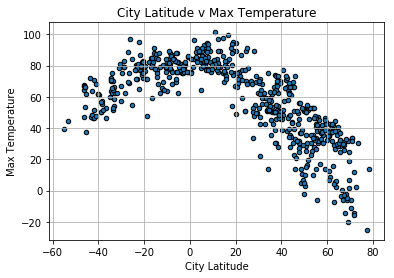

In [147]:
ax1 = cities_df.plot.scatter(x='Lat',
                       y='Max Temp',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.grid()

In [ ]:
# save png 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#### Latitude vs. Humidity Plot

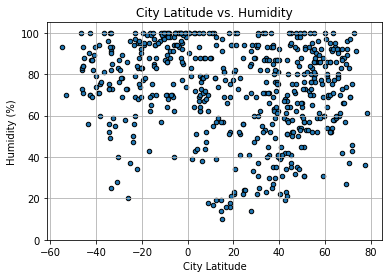

In [162]:
ax2 = clean_cities_df.plot.scatter(x='Lat',
                       y='Humidity',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()

In [ ]:
# save png 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#### Latitude vs. Cloudiness Plot

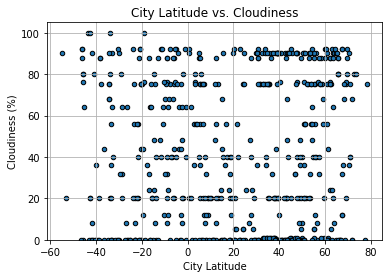

In [163]:
ax3 = clean_cities_df.plot.scatter(x='Lat',
                       y='Cloudiness',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 105)
plt.grid()

In [ ]:
# save png 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#### Latitude vs. Wind Speed Plot

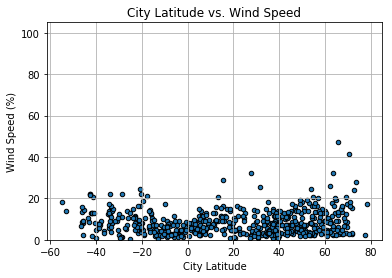

In [168]:
ax4 = clean_cities_df.plot.scatter(x='Lat',
                       y='Wind Speed',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(0, 105)
plt.grid()

In [ ]:
# save png 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~